#### Model: 

\begin{eqnarray}
X_t & = & A X_{t-1} + \nu_t,
\\
Y_t & = & C X_t + \omega_t,
\\
\nu_t & \sim & \text{N}(0, Q ) ~~ \text{with} ~ Q = \sigma_x^2 I,
\\
\omega_t & \sim & \text{N}(0, R) ~~ \text{with} ~ R = \sigma_y^2 I.
\end{eqnarray}

In [1]:
from __future__ import division
%matplotlib inline
from pykalman import KalmanFilter
import numpy as np, numpy.random as npr, matplotlib.pyplot as plt, copy
from scipy.stats import *
from pylab import plot, show, legend
from tqdm import trange
from kalman import *

In [29]:
A = np.asarray([[0.9, -0.3], [0, 1]])
C = np.asarray([[0.1, 0.5], [-0.3, 0.0]])
dim = np.shape(A)[0]
sigmax2 = 1
sigmay2 = 1
Q = sigmax2*np.eye(dim)
R = sigmay2*np.eye(dim)
mu0 = np.zeros(dim)
Sigma0 = np.eye(dim)

In [30]:
T = 100
Y, X = generate_data_linear_gaussian(mu0, Sigma0, A, C, Q, R, T)

kf = KalmanFilter(initial_state_mean=mu0,
                  initial_state_covariance=Sigma0,
                  transition_matrices=A, 
                  observation_matrices=C, 
                  transition_covariance=Q, 
                  observation_covariance=R)
(filtered_state_means, filtered_state_covariances) = kf.filter(Y)

### Sanity checks:

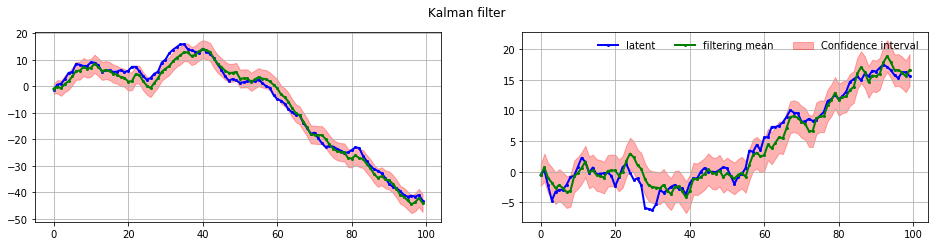

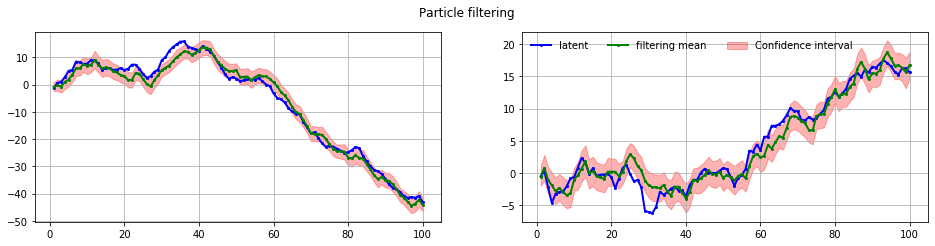

In [34]:
plt.rcParams['figure.figsize'] = (16, 3.5)
for i in range(2) :
    plt.subplot(1,2,i+1)
    plt.plot(X[:,i], "bo-", label="latent", markersize=2, linewidth=2)
    plt.plot(filtered_state_means[:,i], "go-", label="filtering mean", markersize=2, linewidth=2)
    plt.fill_between(np.arange(T), 
                     filtered_state_means[:,i] + 2*np.sqrt(filtered_state_covariances[:,i,i]), 
                     filtered_state_means[:,i] - 2*np.sqrt(filtered_state_covariances[:,i,i]), 
                     color='red', alpha=0.3, label="Confidence interval")
    plt.grid(True)
plt.legend(ncol=3, frameon=False)
plt.suptitle("Kalman filter")
plt.show()

n_particles = 1000
logNC, particles = bootstrap_PF(Y, A, C, sigmax2, sigmay2, mu0, Sigma0, n_particles)

for i in range(2) :
    plt.subplot(1,2,i+1)
    plt.plot(np.arange(1,T+1), X[:,i],  "bo-", label="latent", markersize=2, linewidth=2)
    plt.plot(np.arange(1,T+1), np.mean(particles[:,:,i],axis=1), "go-", label="filtering mean", markersize=2, linewidth=2)
    plt.fill_between(np.arange(1,T+1), 
                     np.percentile(particles[:,:,i],axis=1,q=5), 
                     np.percentile(particles[:,:,i],axis=1,q=95), 
                     color='red', alpha=0.3, label="Confidence interval")
    plt.grid(True)
plt.legend(ncol=3, frameon=False)
plt.suptitle("Particle filtering");

In [32]:
aa = np.exp(np.linspace(-20,20,100))
lls = np.zeros(len(aa))
for (i,a) in enumerate(aa) :
    lls[i] = log_likelihood(Y, A, C, sigmax2, a, mu0, Sigma0)

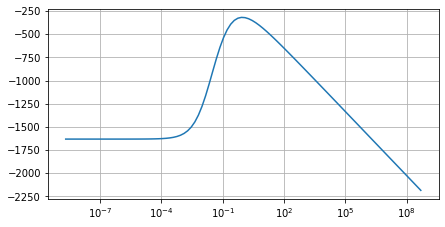

In [6]:
plt.rcParams['figure.figsize'] = (7, 3.5)
plt.plot(aa, lls)
plt.xscale('log')
plt.grid(True)

### MCMC:

In [7]:
n_mcmc = 10_000
scale = [0.8, 0.3]

10.0 % run in 0.5 mins
20.0 % run in 1.0 mins
30.0 % run in 1.5 mins
40.0 % run in 2.0 mins
50.0 % run in 2.5 mins
60.0 % run in 2.9 mins
70.0 % run in 3.4 mins
80.0 % run in 3.9 mins
90.0 % run in 4.4 mins
100.0 % run in 4.9 mins
26.27 % acceptance rate


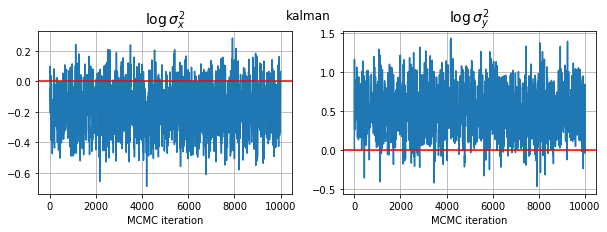

In [8]:
power = 1
log_sigmay2_chain_pow1, log_sigmax2_chain_pow1, accepted_pow1, scales_pow1 \
= adaptive_MH(Y, A, C, sigmax2, sigmay2, mu0, Sigma0, n_mcmc, scale=scale, power=power, kappa=2)

plot(log_sigmay2_chain_pow1, log_sigmax2_chain_pow1, sigmax2, sigmay2, "kalman")

In [9]:
scales_pow1[-1]

array([0.53083881, 0.27592389])

10.0 % run in 0.5 mins
20.0 % run in 1.0 mins
30.0 % run in 1.5 mins
40.0 % run in 2.0 mins
50.0 % run in 2.5 mins
60.0 % run in 3.0 mins
70.0 % run in 3.5 mins
80.0 % run in 4.0 mins
90.0 % run in 4.5 mins
100.0 % run in 5.0 mins
25.74 % acceptance rate


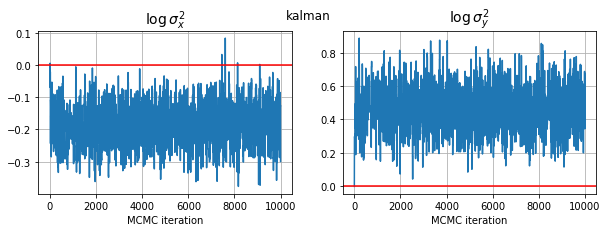

In [13]:
power = 5
log_sigmay2_chain_pow5, log_sigmax2_chain_pow5, accepted_pow5, scales_pow5 \
= adaptive_MH(Y, A, C, sigmax2, sigmay2, mu0, Sigma0, n_mcmc, scale=scale/np.sqrt(power), power=power, kappa=2)

plot(log_sigmay2_chain_pow5, log_sigmax2_chain_pow5, sigmax2, sigmay2, "kalman")

10.0 % run in 0.5 mins
20.0 % run in 1.0 mins
30.0 % run in 1.5 mins
40.0 % run in 2.0 mins
50.0 % run in 2.5 mins
60.0 % run in 3.0 mins
70.0 % run in 3.4 mins
80.0 % run in 3.9 mins
90.0 % run in 4.4 mins
100.0 % run in 4.9 mins
45.78 % acceptance rate


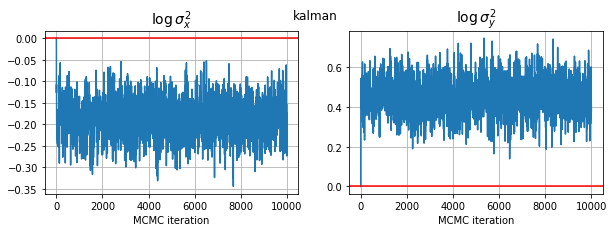

In [14]:
power = 10
log_sigmay2_chain_pow10, log_sigmax2_chain_pow10, accepted_pow10, scales_pow10 \
= adaptive_MH(Y, A, C, sigmax2, sigmay2, mu0, Sigma0, n_mcmc, scale=scale/np.sqrt(power), power=power, kappa=2)

plot(log_sigmay2_chain_pow10, log_sigmax2_chain_pow10, sigmax2, sigmay2, "kalman")

In [15]:
print(np.round(np.var(log_sigmay2_chain_pow1)/np.var(log_sigmay2_chain_pow5),1), 
      np.round(np.var(log_sigmax2_chain_pow1)/np.var(log_sigmax2_chain_pow5),1))
print(np.round(np.var(log_sigmay2_chain_pow1)/np.var(log_sigmay2_chain_pow10),1),
      np.round(np.var(log_sigmax2_chain_pow1)/np.var(log_sigmax2_chain_pow10),1))

5.4 4.7
10.8 9.4


In [17]:
print(np.round([np.mean(np.exp(log_sigmax2_chain_pow1)), 
                np.mean(np.exp(log_sigmax2_chain_pow5)), 
                np.mean(np.exp(log_sigmax2_chain_pow10))],2))
print(np.round([np.mean(np.exp(log_sigmay2_chain_pow1)), 
                np.mean(np.exp(log_sigmay2_chain_pow5)), 
                np.mean(np.exp(log_sigmay2_chain_pow10))],2))

[1.73 1.6  1.58]
[0.85 0.83 0.83]
